<a href="https://colab.research.google.com/github/SamillyNunes/machine-learning-study/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means
Algoritmos não supervisionados.
K-Means = É um agrupador que utiliza a distância euclidiana para agrupar os dados a partir de um número de clusters definidos pelo usuário.

Nesse exemplo, será agrupado sem utilizar a classe e comparar se o agrupamento terá similaridade com a classe existente.

In [1]:
# importacoes
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as  plt
from sklearn.cluster import KMeans

In [4]:
# base de dados
iris = datasets.load_iris()

# Visualizao de qtos registros existem por classe
unicos,quantidade = np.unique(iris.target,return_counts=True)
unicos, quantidade

(array([0, 1, 2]), array([50, 50, 50]))

### Agrupamento

In [5]:
# Agrupamento utilizando 3 clusters, que eh a quantidade de classes possiveis
cluster = KMeans(n_clusters=3)
cluster.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
# visualizacao dos 3 centroides
centroides = cluster.cluster_centers_
centroides

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
# visualizar grupos qye cada registro foi associado
previsoes = cluster.labels_
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [8]:
# contagem dos registros por classe na previsao
unicos2, quantidade2 = np.unique(previsoes, return_counts=True)
unicos2, quantidade2

(array([0, 1, 2], dtype=int32), array([50, 62, 38]))

In [9]:
confusao = confusion_matrix(iris.target,previsoes)
confusao

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

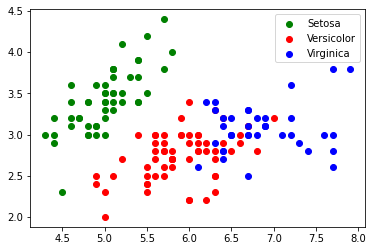

In [11]:
# graficos com os cluster gerados, considerando as previsoes
plt.scatter(iris.data[previsoes==0,0], iris.data[previsoes==0,1], c='g', label='Setosa')
plt.scatter(iris.data[previsoes==1,0], iris.data[previsoes==1,1], c='r', label='Versicolor')
plt.scatter(iris.data[previsoes==2,0], iris.data[previsoes==2,1], c='b', label='Virginica')
plt.legend()